### LSE Data Analytics Online Career Accelerator 

# DA301:  Advanced Analytics for Organisational Impact

## Assignment template

### Scenario
You are a data analyst working for Turtle Games, a game manufacturer and retailer. They manufacture and sell their own products, along with sourcing and selling products manufactured by other companies. Their product range includes books, board games, video games and toys. They have a global customer base and have a business objective of improving overall sales performance by utilising customer trends. In particular, Turtle Games wants to understand: 
- how customers accumulate loyalty points (Week 1)
- how useful are remuneration and spending scores data (Week 2)
- can social data (e.g. customer reviews) be used in marketing campaigns (Week 3)
- what is the impact on sales per product (Week 4)
- the reliability of the data (e.g. normal distribution, Skewness, Kurtosis) (Week 5)
- if there is any possible relationship(s) in sales between North America, Europe, and global sales (Week 6).

# Week 1 assignment: Linear regression using Python
The marketing department of Turtle Games prefers Python for data analysis. As you are fluent in Python, they asked you to assist with data analysis of social media data. The marketing department wants to better understand how users accumulate loyalty points. Therefore, you need to investigate the possible relationships between the loyalty points, age, remuneration, and spending scores. Note that you will use this data set in future modules as well and it is, therefore, strongly encouraged to first clean the data as per provided guidelines and then save a copy of the clean data for future use.

## Instructions
1. Load and explore the data.
    1. Create a new DataFrame (e.g. reviews).
    2. Sense-check the DataFrame.
    3. Determine if there are any missing values in the DataFrame.
    4. Create a summary of the descriptive statistics.
2. Remove redundant columns (`language` and `platform`).
3. Change column headings to names that are easier to reference (e.g. `renumeration` and `spending_score`).
4. Save a copy of the clean DataFrame as a CSV file. Import the file to sense-check.
5. Use linear regression and the `statsmodels` functions to evaluate possible linear relationships between loyalty points and age/renumeration/spending scores to determine whether these can be used to predict the loyalty points.
    1. Specify the independent and dependent variables.
    2. Create the OLS model.
    3. Extract the estimated parameters, standard errors, and predicted values.
    4. Generate the regression table based on the X coefficient and constant values.
    5. Plot the linear regression and add a regression line.
6. Include your insights and observations.

## 1. Load and explore the data

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols

In [2]:
# Load the CSV file(s) as reviews.
reviews_df = pd.read_csv('turtle_reviews.csv')

# View the DataFrame.
reviews_df.head()

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [3]:
# Check Metadata.
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


In [4]:
# Any missing values?
reviews_df_na = reviews_df[reviews_df.isna().any(axis=1)]

print(f'Missing Values (rows, columns): {reviews_df_na.shape}')

Missing Values (rows, columns): (0, 11)


In [5]:
# Explore the data.
print(f'Dimensions (rows, columns) : {reviews_df.shape}')
print('\n')
print(f'dtype information:')
print(reviews_df.dtypes)
print('\n')

Dimensions (rows, columns) : (2000, 11)


dtype information:
gender                     object
age                         int64
remuneration (k£)         float64
spending_score (1-100)      int64
loyalty_points              int64
education                  object
language                   object
platform                   object
product                     int64
review                     object
summary                    object
dtype: object




In [6]:
# Descriptive statistics.
reviews_df.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


## 2. Drop columns

In [7]:
# Drop unnecessary columns.
reviews_df2 = reviews_df.drop(['language', 'platform'], axis=1)

# View column names.
reviews_df2

,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


## 3. Rename columns

In [8]:
# Rename the column headers.
reviews_df2.rename(columns={'remuneration (k£)': 'remuneration', 'spending_score (1-100)': 'spending_score'}, 
                   inplace=True)

# View column names.
reviews_df2.columns

reviews_df2.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 4. Save the DataFrame as a CSV file

In [9]:
# Create a CSV file as output.
reviews_df2.to_csv('turtle_reviews_modified.csv', index=False)

In [10]:
# Import new CSV file with Pandas.
reviews_mod_df = pd.read_csv('turtle_reviews_modified.csv')

# View DataFrame.
reviews_mod_df.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


## 5. Linear regression

### 5a) spending vs loyalty

Text(0, 0.5, 'loyalty points')

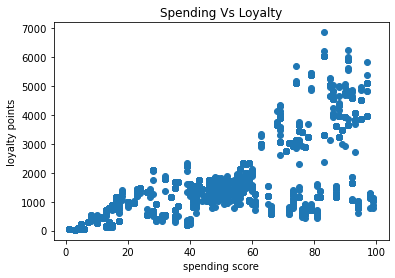

In [11]:
# Independent variable.
X = reviews_mod_df["spending_score"] 

# Dependent variable.
y  = reviews_mod_df["loyalty_points"] 

# OLS model and summary.
# Check for linearity.
plt.scatter(X,y)

plt.title('Spending Vs Loyalty')
plt.xlabel('spending score')
plt.ylabel('loyalty points')

In [12]:
# Run the OLS test.
f = 'y ~ X'
test = ols(f, data = reviews_mod_df).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.452
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     1648.
Date:                Mon, 02 Jan 2023   Prob (F-statistic):          2.92e-263
Time:                        16:37:52   Log-Likelihood:                -16550.
No. Observations:                2000   AIC:                         3.310e+04
Df Residuals:                    1998   BIC:                         3.312e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -75.0527     45.931     -1.634      0.102    -165.129      15.024
X             33.0617      0.814     40.595      0.000      31.464      34.659
==============================================================================
Omnibus:                      126.554   Durbin-Watson:                   1.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              260.528
Skew:                           0.422   Prob(JB):                     2.67e-57
Kurtosis:                       4.554   Cond. No.                         122.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
# Extract the estimated parameters.
print(f'Parameters: {test.params}')

# Extract the standard errors.
print(f'Standard Errors: {test.bse}')

# Extract the predicted values.
print(f'Predicted Values: {test.predict()}')


Parameters: Intercept   -75.052663
X            33.061693
dtype: float64
Standard Errors: Intercept    45.930554
X             0.814419
dtype: float64
Predicted Values: [1214.35337415 2602.94449102  123.31749662 ... 2933.56142361  453.93442921
  189.44088314]


In [14]:
# Set the X coefficient and the constant to generate the regression table.
y_pred = (-75.052663) + 33.0617 * reviews_mod_df["spending_score"] 

# View the output.
y_pred

0       1214.353637
1       2602.945037
2        123.317537
3       2470.698237
4       1247.415337
           ...     
1995    2206.204637
1996     189.440937
1997    2933.562037
1998     453.934537
1999     189.440937
Name: spending_score, Length: 2000, dtype: float64

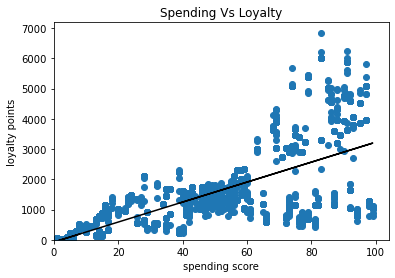

In [15]:
# Plot the graph with a regression line.
plt.scatter(X, y)

# Plot the line.
plt.plot(X, y_pred, color='black')
plt.xlim(0)
plt.ylim(0)
plt.title('Spending Vs Loyalty')
plt.xlabel('spending score')
plt.ylabel('loyalty points')
plt.show()

### 5b) renumeration vs loyalty

Text(0, 0.5, 'Loyalty points')

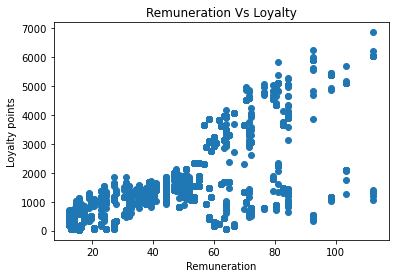

In [16]:
# Independent variable.
X = reviews_mod_df["remuneration"]

# Dependent variable.
y = reviews_mod_df["loyalty_points"]

# OLS model and summary.
plt.scatter(X,y)
plt.title('Remuneration Vs Loyalty')
plt.xlabel('Remuneration')
plt.ylabel('Loyalty points')

In [17]:
# Run the OLS test.
f = 'y ~ X'
test = ols(f, data = reviews_mod_df).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     1222.
Date:                Mon, 02 Jan 2023   Prob (F-statistic):          2.43e-209
Time:                        16:37:56   Log-Likelihood:                -16674.
No. Observations:                2000   AIC:                         3.335e+04
Df Residuals:                    1998   BIC:                         3.336e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -65.6865     52.171     -1.259      0.208    -168.001      36.628
X             34.1878      0.978     34.960      0.000      32.270      36.106
==============================================================================
Omnibus:                       21.285   Durbin-Watson:                   3.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               31.715
Skew:                           0.089   Prob(JB):                     1.30e-07
Kurtosis:                       3.590   Cond. No.                         123.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# Extract the estimated parameters.
print(f'Parameters: {test.params}')

# Extract the standard errors.
print(f'Standard Errors: {test.bse}')

# Extract the predicted values.
print(f'Predicted Values: {test.predict()}')

Parameters: Intercept   -65.686513
X            34.187825
dtype: float64
Standard Errors: Intercept    52.170717
X             0.977925
dtype: float64
Predicted Values: [ 354.82374068  354.82374068  382.85775758 ... 3102.15739671 3298.39551499
 3102.15739671]


In [19]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred = (-65.6865) + 34.1878 * reviews_mod_df["remuneration"]

# View the output.
y_pred

0        354.823440
1        354.823440
2        382.857436
3        382.857436
4        410.891432
           ...     
1995    2821.815088
1996    3102.155048
1997    3102.155048
1998    3298.393020
1999    3102.155048
Name: remuneration, Length: 2000, dtype: float64

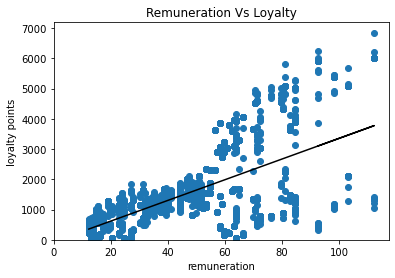

In [20]:
# Plot graph with regression line.
plt.scatter(X, y)

# Plot the line.
plt.plot(X, y_pred, color='black')
plt.xlim(0)
plt.ylim(0)
plt.title('Remuneration Vs Loyalty')
plt.xlabel('remuneration')
plt.ylabel('loyalty points')
plt.show()

### 5c) age vs loyalty

Text(0, 0.5, 'loyalty points')

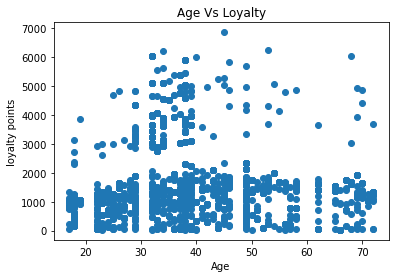

In [21]:
# Independent variable.
X = reviews_mod_df["age"]

# Dependent variable.
y = reviews_mod_df["loyalty_points"]

# OLS model and summary.
plt.scatter(X,y)
plt.title('Age Vs Loyalty')
plt.xlabel('Age')
plt.ylabel('loyalty points')

In [22]:
# Run the OLS test.
f = 'y ~ X'
test = ols(f, data = reviews_mod_df).fit()

# View the output.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     3.606
Date:                Mon, 02 Jan 2023   Prob (F-statistic):             0.0577
Time:                        16:37:58   Log-Likelihood:                -17150.
No. Observations:                2000   AIC:                         3.430e+04
Df Residuals:                    1998   BIC:                         3.431e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1736.5177     88.249     19.678      0.000    1563.449    1909.587
X             -4.0128      2.113     -1.899      0.058      -8.157       0.131
==============================================================================
Omnibus:                      481.477   Durbin-Watson:                   2.277
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              937.734
Skew:                           1.449   Prob(JB):                    2.36e-204
Kurtosis:                       4.688   Cond. No.                         129.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
# Extract the estimated parameters.
print(f'Parameters: {test.params}')

# Extract the standard errors.
print(f'Standard Errors: {test.bse}')

# Extract the predicted values.
print(f'Predicted Values: {test.predict()}')

Parameters: Intercept    1736.517739
X              -4.012805
dtype: float64
Standard Errors: Intercept    88.248731
X             2.113177
dtype: float64
Predicted Values: [1664.2872467  1644.22322095 1648.2360261  ... 1600.0823643  1600.0823643
 1608.1079746 ]


In [24]:
# Set the the X coefficient and the constant to generate the regression table.
y_pred = (1736.5177) + (-4.0128) * reviews_mod_df["age"]

# View the output.
y_pred

0       1664.2873
1       1644.2233
2       1648.2361
3       1636.1977
4       1604.0953
          ...    
1995    1588.0441
1996    1563.9673
1997    1600.0825
1998    1600.0825
1999    1608.1081
Name: age, Length: 2000, dtype: float64

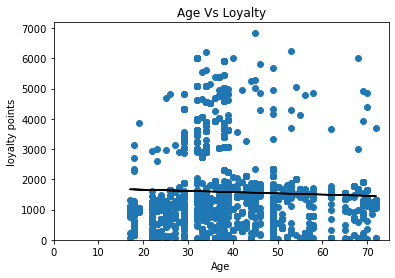

In [25]:
# Plot graph with regression line.
# Plot graph with regression line.
plt.scatter(X, y)

# Plot the line.
plt.plot(X, y_pred, color='black')
plt.xlim(0)
plt.ylim(0)
plt.title('Age Vs Loyalty')
plt.xlabel('Age')
plt.ylabel('loyalty points')
plt.show()

## 6. Observations and insights

***Your observations here...***






By using OLS and the statsmodels module, we tried to create a best fit line, but there seems to be no relation between age and loyalty points.

From the linear model there looks oto be.  relation between remuneration & spending score with the loyalty points.
spending score contains more values closer to the regression line compared to remuneration.

# 

# Week 2 assignment: Clustering with *k*-means using Python

The marketing department also wants to better understand the usefulness of renumeration and spending scores but do not know where to begin. You are tasked to identify groups within the customer base that can be used to target specific market segments. Use *k*-means clustering to identify the optimal number of clusters and then apply and plot the data using the created segments.

## Instructions
1. Prepare the data for clustering. 
    1. Import the CSV file you have prepared in Week 1.
    2. Create a new DataFrame (e.g. `df2`) containing the `renumeration` and `spending_score` columns.
    3. Explore the new DataFrame. 
2. Plot the renumeration versus spending score.
    1. Create a scatterplot.
    2. Create a pairplot.
3. Use the Silhouette and Elbow methods to determine the optimal number of clusters for *k*-means clustering.
    1. Plot both methods and explain how you determine the number of clusters to use.
    2. Add titles and legends to the plot.
4. Evaluate the usefulness of at least three values for *k* based on insights from the Elbow and Silhoutte methods.
    1. Plot the predicted *k*-means.
    2. Explain which value might give you the best clustering.
5. Fit a final model using your selected value for *k*.
    1. Justify your selection and comment on the respective cluster sizes of your final solution.
    2. Check the number of observations per predicted class.
6. Plot the clusters and interpret the model.

## 1. Load and explore the data

In [26]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import cdist

import warnings
warnings.filterwarnings('ignore')

In [27]:
# Load the CSV file(s) as df2.
df2 = pd.read_csv('turtle_reviews_modified.csv')

# View DataFrame.
df2

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap
...,...,...,...,...,...,...,...,...,...
1995,Female,37,84.46,69,4031,PhD,977,The perfect word game for mixed ages (with Mom...,The perfect word game for mixed ages (with Mom
1996,Female,43,92.66,8,539,PhD,979,Great game. Did not think I would like it whe...,Super fun
1997,Male,34,92.66,91,5614,graduate,1012,Great game for all.........\nKeeps the mind ni...,Great Game
1998,Male,34,98.40,16,1048,PhD,1031,fun game!,Four Stars


In [28]:
# Drop unnecessary columns.
df3 = df2.filter(['remuneration','spending_score', 'loyalty_points'], axis=1)

# View DataFrame.
df3

,remuneration,spending_score,loyalty_points
0,12.30,39,210
1,12.30,81,524
2,13.12,6,40
3,13.12,77,562
4,13.94,40,366
...,...,...,...
1995,84.46,69,4031
1996,92.66,8,539
1997,92.66,91,5614
1998,98.40,16,1048


In [29]:
# Explore the data.
print(f'Dimensions (rows, columns) : {df3.shape}')
print('\n')
print(f'dtype information:')
print(df3.dtypes)
print('\n')

Dimensions (rows, columns) : (2000, 3)


dtype information:
remuneration      float64
spending_score      int64
loyalty_points      int64
dtype: object




In [30]:
# Descriptive statistics.
df3.describe()

,remuneration,spending_score,loyalty_points
count,2000.000000,2000.000000,2000.000000
mean,48.079060,50.000000,1578.032000
std,23.123984,26.094702,1283.239705
min,12.300000,1.000000,25.000000
25%,30.340000,32.000000,772.000000
50%,47.150000,50.000000,1276.000000
75%,63.960000,73.000000,1751.250000
max,112.340000,99.000000,6847.000000


## 2. Plot

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

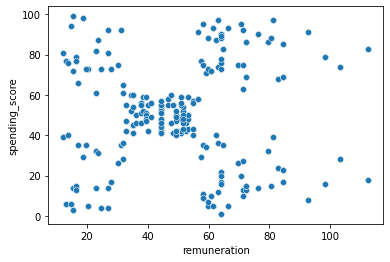

In [31]:
# Create a scatterplot with Seaborn.
sns.scatterplot(x='remuneration', y='spending_score', data=df3)

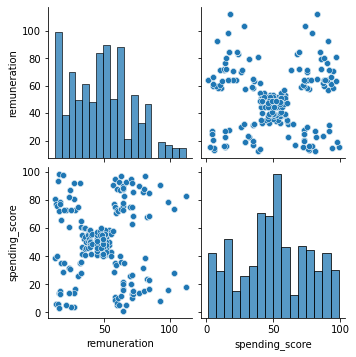

In [32]:
# Create a pairplot with Seaborn.
x = df3[['remuneration', 'spending_score']]
sns.pairplot(df3, vars=x)

## 3. Elbow and silhoutte methods

      remuneration  spending_score
0            12.30              39
1            12.30              81
2            13.12               6
3            13.12              77
4            13.94              40
...            ...             ...
1995         84.46              69
1996         92.66               8
1997         92.66              91
1998         98.40              16
1999         92.66               8

[2000 rows x 2 columns]


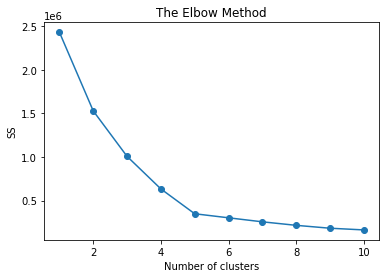

In [33]:
# Determine the number of clusters: Elbow method.
print(x)
ss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,
                    init = 'k-means++', 
                    max_iter = 500,
                    n_init = 10,
                    random_state = 42)
    kmeans.fit(x)
    ss.append(kmeans.inertia_)

plt.plot(range(1, 11),
         ss,
         marker='o')

plt.title("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("SS")

plt.show()

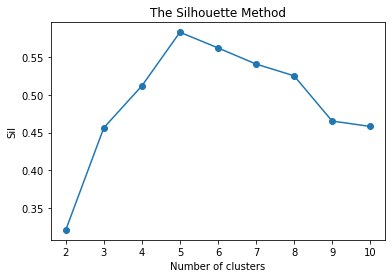

In [34]:
# Determine the number of clusters: Silhouette method.
sil = []
kmax = 10

for k in range(2, kmax+1):
    kmeans_s = KMeans(n_clusters = k).fit(x)
    labels = kmeans_s.labels_
    sil.append(silhouette_score(x,
                                labels,
                                metric = 'euclidean'))

# Plot the silhouette method.
plt.plot(range(2, kmax+1),
         sil,
         marker='o')

plt.title("The Silhouette Method")
plt.xlabel("Number of clusters")
plt.ylabel("Sil")

plt.show()

## 4. Evaluate k-means model at different values of *k*

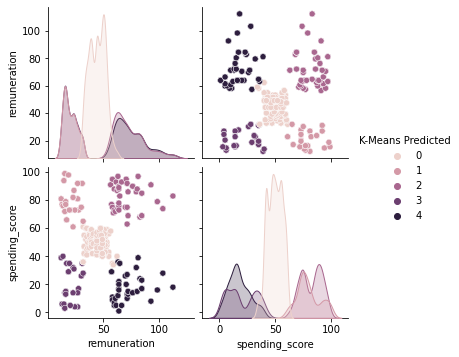

In [35]:
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [36]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

In [37]:
print(x.head())

   remuneration  spending_score  K-Means Predicted
0         12.30              39                  3
1         12.30              81                  1
2         13.12               6                  3
3         13.12              77                  1
4         13.94              40                  3


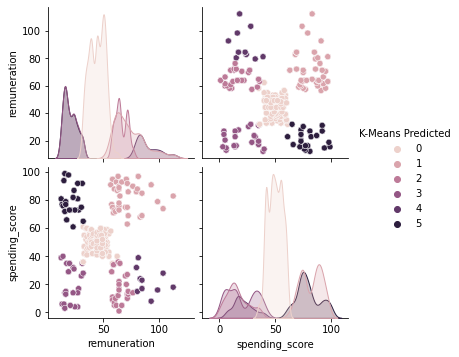

In [38]:
# Use 6 clusters:
kmeans = KMeans(n_clusters = 6,
                max_iter = 15000,
                init='k-means++',
                random_state=0).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [39]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    767
1    356
3    271
5    269
2    214
4    123
Name: K-Means Predicted, dtype: int64

## 5. Fit final model and justify your choice

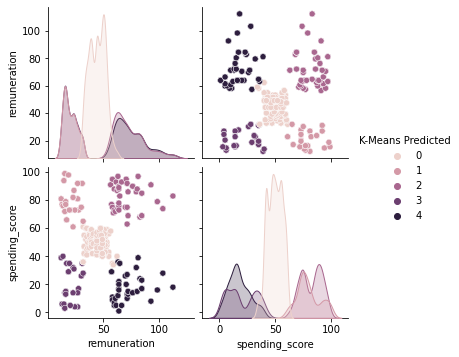

In [40]:
# Apply the final model.
# Use 5 clusters:
kmeans = KMeans(n_clusters = 5,
                max_iter = 15000,
                init='k-means++',
                random_state=42).fit(x)

clusters = kmeans.labels_
x['K-Means Predicted'] = clusters

# Plot the predicted.
sns.pairplot(x,
             hue='K-Means Predicted',
             diag_kind= 'kde')

In [41]:
# Check the number of observations per predicted class.
x['K-Means Predicted'].value_counts()

0    774
2    356
4    330
3    271
1    269
Name: K-Means Predicted, dtype: int64

## 6. Plot and interpret the clusters

In [42]:
# View the DataFrame.print(x.head())

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

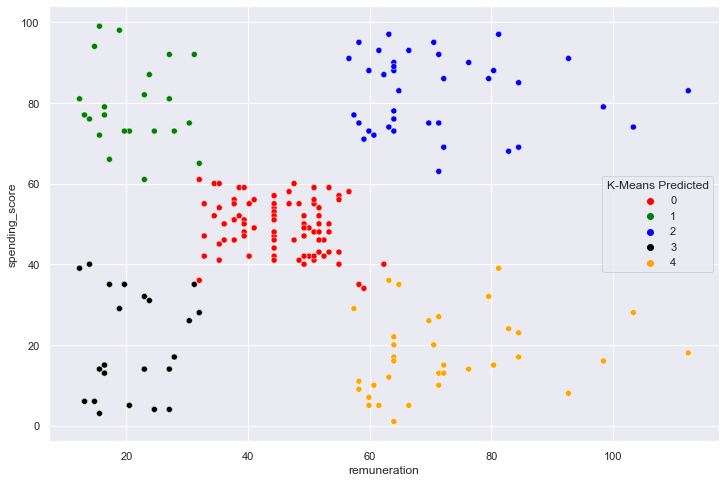

In [43]:
# Visualising the clusters.
sns.set(rc = {'figure.figsize':(12, 8)})

sns.scatterplot(x='remuneration' , 
                y ='spending_score',
                data=x ,
                hue='K-Means Predicted',
                palette=['red', 'green', 'blue', 'black', 'orange'])


## 7. Discuss: Insights and observations

***Your observations here...***

It seems 5 clusters gives the best results.5 clusters indicates better distributin compared to 6 clusters.
spending score is high for less & low remuneration. with cluster 5 we can see clear demarcation, 
whereas with 6 clusters we see existing clusters being split and we cant see the even distribution as 5 clusters.

# 

# Week 3 assignment: NLP using Python
Customer reviews were downloaded from the website of Turtle Games. This data will be used to steer the marketing department on how to approach future campaigns. Therefore, the marketing department asked you to identify the 15 most common words used in online product reviews. They also want to have a list of the top 20 positive and negative reviews received from the website. Therefore, you need to apply NLP on the data set.

## Instructions
1. Load and explore the data. 
    1. Sense-check the DataFrame.
    2. You only need to retain the `review` and `summary` columns.
    3. Determine if there are any missing values.
2. Prepare the data for NLP
    1. Change to lower case and join the elements in each of the columns respectively (`review` and `summary`).
    2. Replace punctuation in each of the columns respectively (`review` and `summary`).
    3. Drop duplicates in both columns (`review` and `summary`).
3. Tokenise and create wordclouds for the respective columns (separately).
    1. Create a copy of the DataFrame.
    2. Apply tokenisation on both columns.
    3. Create and plot a wordcloud image.
4. Frequency distribution and polarity.
    1. Create frequency distribution.
    2. Remove alphanumeric characters and stopwords.
    3. Create wordcloud without stopwords.
    4. Identify 15 most common words and polarity.
5. Review polarity and sentiment.
    1. Plot histograms of polarity (use 15 bins) for both columns.
    2. Review the sentiment scores for the respective columns.
6. Identify and print the top 20 positive and negative reviews and summaries respectively.
7. Include your insights and observations.

## 1. Load and explore the data

In [44]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm

# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [45]:
# Load the data set as df3.
df3 = pd.read_csv('turtle_reviews_modified.csv')

# View DataFrame.
df3.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [46]:
# Explore data set.
df3.shape

(2000, 9)

In [47]:
# Keep necessary columns. Drop unnecessary columns.
df4 = df3.filter(['review','summary'], axis=1)

# View DataFrame.
df4.head()

,review,summary
0,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,As my review of GF9's previous screens these w...,Money trap


In [48]:
# Determine if there are any missing values.
df4_na = df4[df4.isna().any(axis=1)]

print(f'Missing Values (rows, columns): {df4_na.shape}')

Missing Values (rows, columns): (0, 2)


## 2. Prepare the data for NLP
### 2a) Change to lower case and join the elements in each of the columns respectively (review and summary)

### 2b) Replace punctuation in each of the columns respectively (review and summary)

In [49]:
# Review: Change all to lower case and join with a space.
# Replace all the punctuations in review column.
df4['review'] = df4['review'].apply(lambda x : ' '.join([x.lower() for x in x.split()]))

df4['review'].head()

0    when it comes to a dm's screen, the space on t...
1    an open letter to galeforce9*: your unpainted ...
2    nice art, nice printing. why two panels are fi...
3    amazing buy! bought it as a gift for our new d...
4    as my review of gf9's previous screens these w...
Name: review, dtype: object

In [50]:
# Summary: Change all to lower case and join with a space.
# Replace all the puncuations in summary column.
df4['summary'] = df4['summary'].apply(lambda x : ' '.join([x.lower() for x in x.split()]))

df4['summary'].head()

0    the fact that 50% of this space is wasted on a...
1    another worthless dungeon master's screen from...
2                      pretty, but also pretty useless
3                                           five stars
4                                           money trap
Name: summary, dtype: object

### 2c) Drop duplicates in both columns

In [51]:
# Drop duplicates in both columns.
print(f'Duplicates in Review : {df4.review.duplicated().sum()}')
print(f'Duplicates in Summary: {df4.summary.duplicated().sum()}')

# View DataFrame.
df5 = df4.drop_duplicates(subset=['review'], ignore_index=True)
df5.reset_index()

df5 = df5.drop_duplicates(subset=['summary'], ignore_index=True)
df5.reset_index()

print(f'(After Removal) Duplicates in Review : {df5.review.duplicated().sum()}')
print(f'(After Removal) Duplicates in Summary: {df5.summary.duplicated().sum()}')

df5.head()

Duplicates in Review : 32
Duplicates in Summary: 598
(After Removal) Duplicates in Review : 0
(After Removal) Duplicates in Summary: 0


,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap


## 3. Tokenise and create wordclouds

In [52]:
# Create new DataFrame (copy DataFrame).
df6 = df5.copy()

# View DataFrame.
df6

,review,summary
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless"
3,amazing buy! bought it as a gift for our new d...,five stars
4,as my review of gf9's previous screens these w...,money trap
...,...,...
1396,"this is a fun ""card"" game for people who like ...","this is a fun ""card"" game for people who like ..."
1397,fun for the family. just make certain you agre...,"sort of a card game equivalent of scrabble, an..."
1398,great game to keep the mind active. we play it...,great game to keep the mind active
1399,we are retired and find this a great way to st...,a great mind game


In [53]:
# Apply tokenisation to both columns.
df6['review_tokens'] = df6['review'].apply(word_tokenize)
df6['summary_tokens'] = df6['summary'].apply(word_tokenize)

# View DataFrame.
df6.head()

,review,summary,review_tokens,summary_tokens
0,"when it comes to a dm's screen, the space on t...",the fact that 50% of this space is wasted on a...,"[when, it, comes, to, a, dm, 's, screen, ,, th...","[the, fact, that, 50, %, of, this, space, is, ..."
1,an open letter to galeforce9*: your unpainted ...,another worthless dungeon master's screen from...,"[an, open, letter, to, galeforce9, *, :, your,...","[another, worthless, dungeon, master, 's, scre..."
2,"nice art, nice printing. why two panels are fi...","pretty, but also pretty useless","[nice, art, ,, nice, printing, ., why, two, pa...","[pretty, ,, but, also, pretty, useless]"
3,amazing buy! bought it as a gift for our new d...,five stars,"[amazing, buy, !, bought, it, as, a, gift, for...","[five, stars]"
4,as my review of gf9's previous screens these w...,money trap,"[as, my, review, of, gf9, 's, previous, screen...","[money, trap]"


In [54]:
# Review: Create a word cloud.
all_review = ''
for i in range(df6.shape[0]):
    # Add each review.
    all_review += df6['review'][i]
    
# Set the colour palette.
sns.set(color_codes=True)

# Create WordCloud object.
review_word_cloud = WordCloud(width=1600, 
                       height=900, 
                       background_color='white', 
                       colormap='plasma', 
                       stopwords='none', 
                       min_font_size=10).generate(all_review)


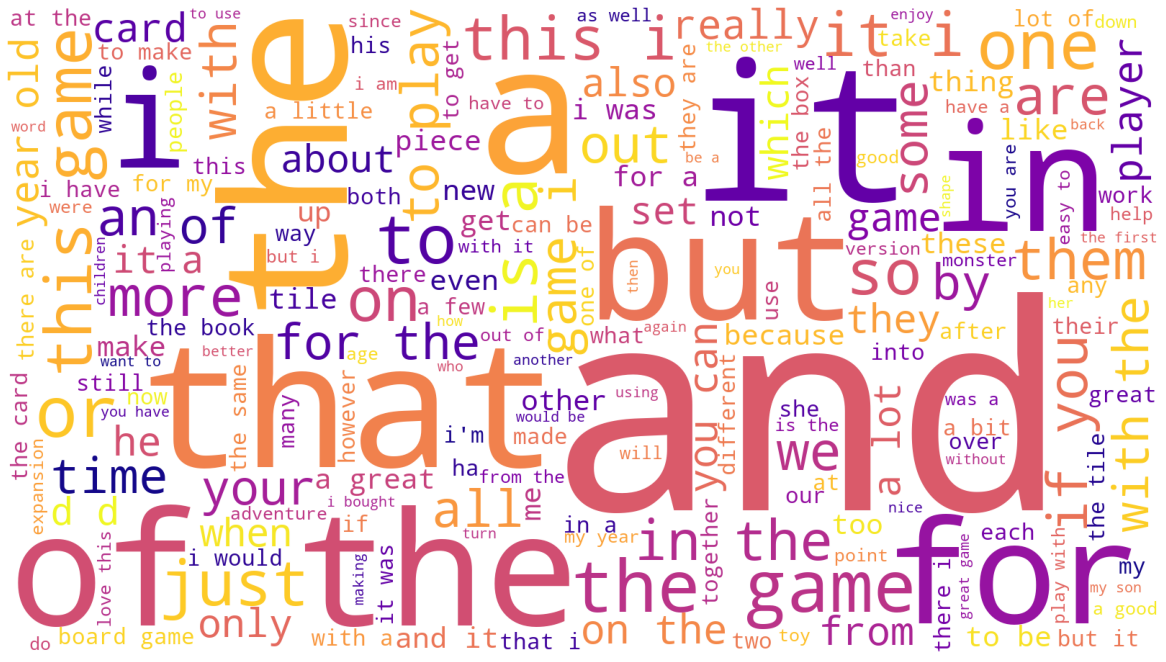

In [55]:
# Review: Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor=None)
plt.imshow(review_word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [56]:
# Summary: Create a word cloud.
all_summary = ''
for i in range(df6.shape[0]):
    # Add each summary.
    all_summary += df6['summary'][i]
    
# Set the colour palette.
sns.set(color_codes=True)

# Create WordCloud object.
summary_word_cloud = WordCloud(width=1600, 
                       height=900, 
                       background_color='white', 
                       colormap='plasma', 
                       stopwords='none', 
                       min_font_size=10).generate(all_summary)

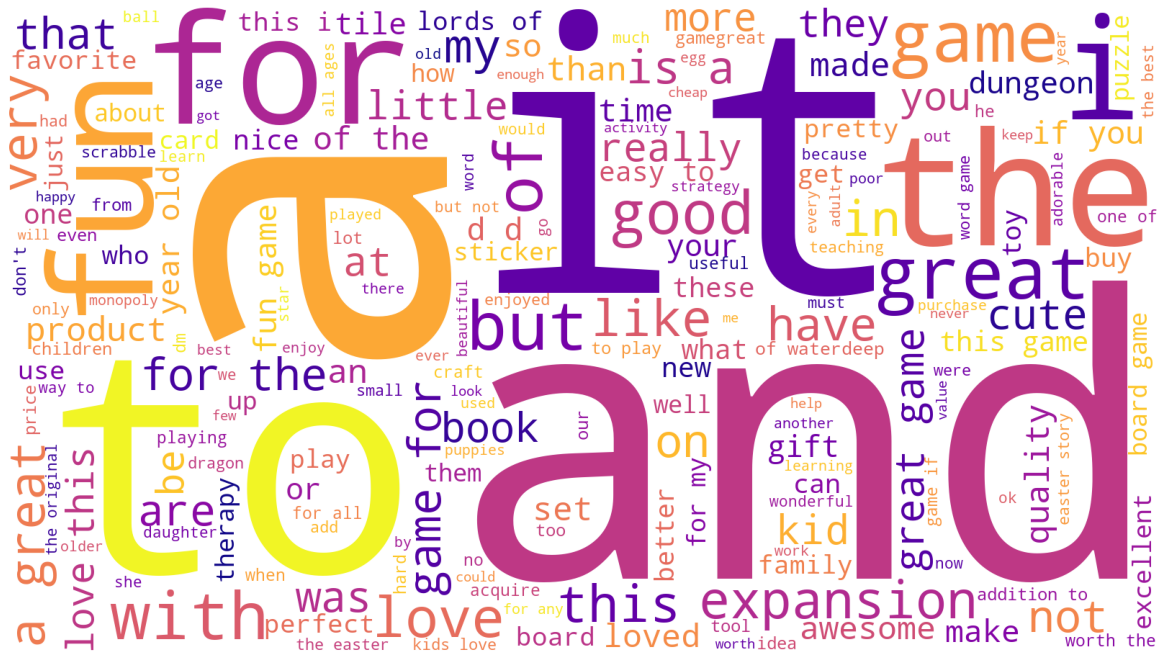

In [57]:
# Summary: Plot the WordCloud image.
plt.figure(figsize=(16, 9), facecolor=None)
plt.imshow(summary_word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## 4. Frequency distribution and polarity
### 4a) Create frequency distribution

In [58]:
# Determine the frequency distribution.
all_tokens = []

for i in range(df6.shape[0]):
    # Add each token to the list.
    all_tokens += df6['review_tokens'][i]
    all_tokens += df6['summary_tokens'][i]
    

fdist = FreqDist(all_tokens)
fdist

FreqDist({'.': 6106, 'the': 5389, ',': 3732, 'and': 3196, 'a': 3162, 'to': 3109, 'of': 2460, 'it': 2435, 'i': 2269, 'is': 1796, ...})

### 4b) Remove alphanumeric characters and stopwords

In [59]:
# Delete all the alpanum.
tokens1 = [word for word in all_tokens if word.isalnum()]

In [60]:
# Remove all the stopwords
# Create set of English stop words.
english_stopwords = set(stopwords.words('english'))

# Create filtered list of tokens without stopwords.
tokens2 = [x for x in tokens1 if x.lower() not in english_stopwords]

# Define a empty string.
tokens2_string = ''
for value in tokens2:
    tokens2_string += value + ' '

### 4c) Create wordcloud without stopwords

In [61]:
# Create a wordcloud without stop words.
# Set the colour palette.
sns.set(color_codes=True)

# Create WordCloud object.
word_cloud = WordCloud(width=1600, 
                       height=900, 
                       background_color='white', 
                       colormap='plasma', 
                       min_font_size=10).generate(tokens2_string)

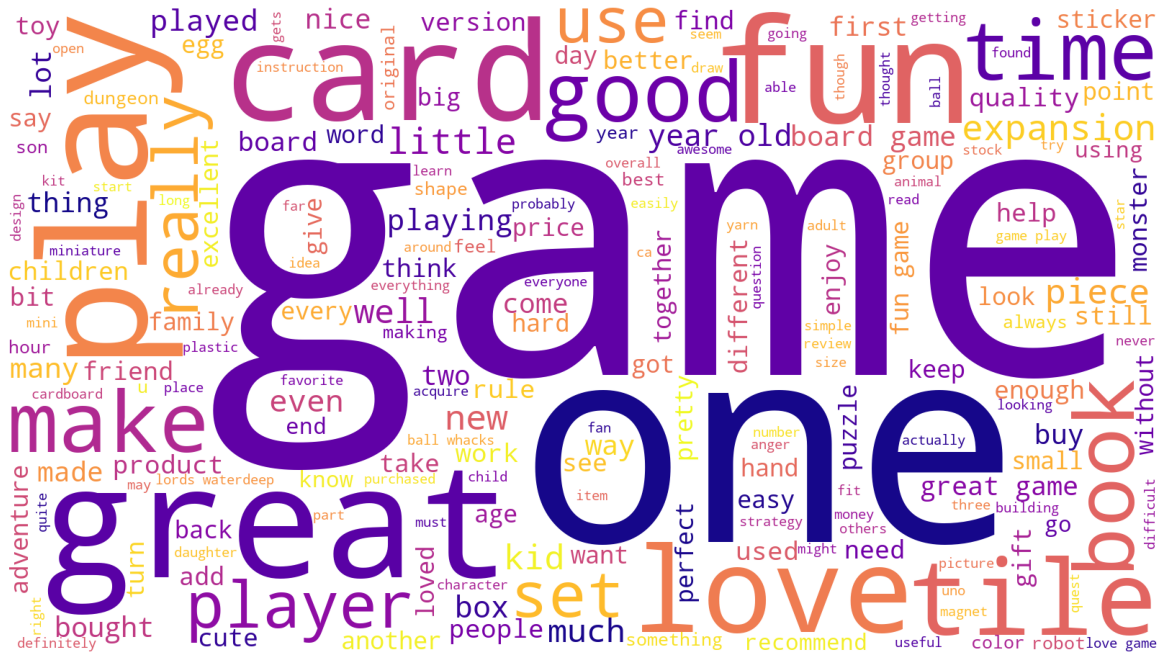

In [62]:
# Plot WordCloud image.
plt.figure(figsize=(16, 9), facecolor=None)
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### 4d) Identify 15 most common words and polarity

In [63]:
# Determine the 15 most common words.
fdist = FreqDist(tokens2)
fdist

from collections import Counter

# Generate data frame from Counter.
counts = pd.DataFrame(Counter(tokens2).most_common(15),
                     columns=['Word', 'Frequency']).set_index('Word')

# Display the result.
counts

,Frequency
Word,
game,1700
great,669
fun,610
one,517
play,481
like,435
love,327
good,324
really,316


## 5. Review polarity and sentiment: Plot histograms of polarity (use 15 bins) and sentiment scores for the respective columns.

In [64]:
# Provided function.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [65]:
# Determine polarity of both columns. 
# Populate a new column with polarity scores for each comment.
df6['review_polarity'] = df6['review'].apply(generate_polarity)
df6['summary_polarity'] = df6['summary'].apply(generate_polarity)

# View output.
print("Review Polarity : \n")
print(df6['review_polarity'].head())
print("Summary Polarity : \n")
print(df6['summary_polarity'].head())

Review Polarity : 

0   -0.036111
1    0.035952
2    0.116640
3    0.628788
4   -0.316667
Name: review_polarity, dtype: float64
Summary Polarity : 

0    0.15
1   -0.80
2    0.00
3    0.00
4    0.00
Name: summary_polarity, dtype: float64


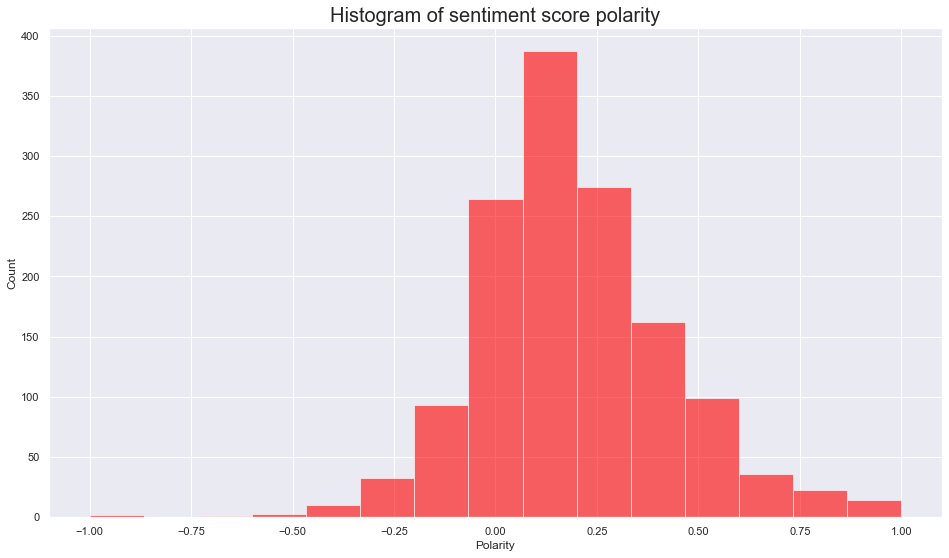

In [66]:
# Review: Create a histogram plot with bins = 15.
# Histogram of polarity
# Histogram of sentiment score
# Set the number of bins.
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df6['review_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show()




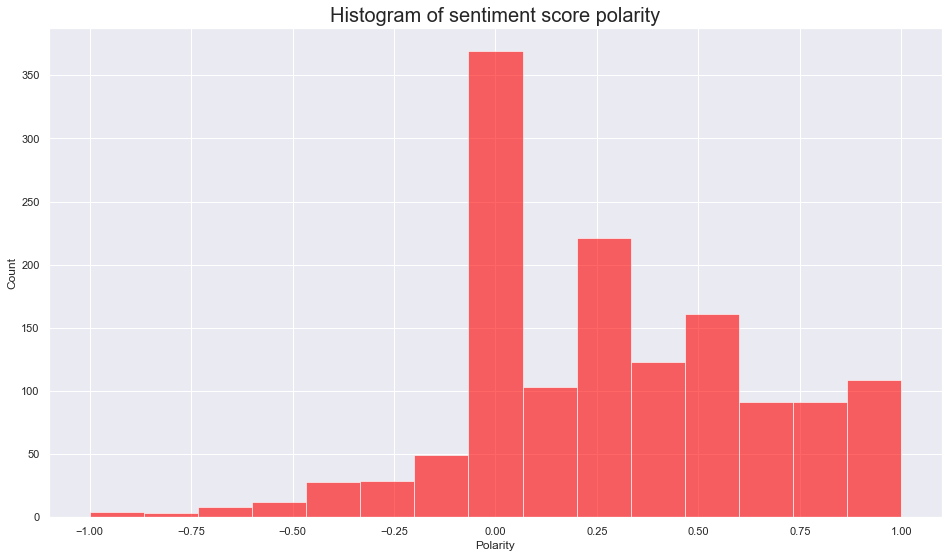

In [67]:
# Summary: Create a histogram plot with bins = 15.
# Histogram of polarity
# Histogram of sentiment score
num_bins = 15

# Set the plot area.
plt.figure(figsize=(16,9))

# Define the bars.
n, bins, patches = plt.hist(df6['summary_polarity'], num_bins, facecolor='red', alpha=0.6)

# Set the labels.
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Histogram of sentiment score polarity', fontsize=20)

plt.show()


## 6. Identify top 20 positive and negative reviews and summaries respectively

In [68]:
# Top 20 negative reviews.
# Create a DataFrame.
negative_sentiment = df6.nsmallest(20, 'review_polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['review', 'review_polarity']]

# View output.
negative_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})


,review,review_polarity
166,booo unles you are patient know how to measure i didn't have the patience neither did my daughter. boring unless you are a craft person which i am not.,-1.000000
147,incomplete kit! very disappointing!,-0.975000
735,"if you, like me, used to play d&d, but now you and your friends ""growed up"" and can't be together because all the responsibilities and bla bla bla... this game is for you! come to the dungeon!",-0.625000
270,"one of my staff will be using this game soon, so i don't know how well it works as yet, but after looking at the cards, i believe it will be helpful in getting a conversation started regarding anger and what to do to control it.",-0.550000
90,i bought this as a christmas gift for my grandson. its a sticker book. so how can i go wrong with this gift.,-0.500000
141,"i sent this product to my granddaughter. the pom-pom maker comes in two parts and is supposed to snap together to create the pom-poms. however, both parts were the same making it unusable. if you can't make the pom-poms the kit is useless. since this was sent as a gift, i do not have it to return. very disappointed.",-0.491667
253,my 8 year-old granddaughter and i were very frustrated and discouraged attempting this craft. it is definitely not for a young child. i too had difficulty understanding the directions. we were very disappointed!,-0.452500
388,i purchased this on the recommendation of two therapists working with my adopted children. the children found it boring and put it down half way through.,-0.440741
316,this game although it appears to be like uno and have an easier play method it was still too time consuming and wordy for my children with learning disabilities.,-0.400000
360,my son loves playing this game. it was recommended by a counselor at school that works with him.,-0.400000


In [69]:
# Top 20 negative summaries.

# Create a DataFrame.
negative_sentiment = df6.nsmallest(20, 'summary_polarity')

# Eliminate unnecessary columns.
negative_sentiment = negative_sentiment[['summary', 'review', 'summary_polarity', 'review_polarity']]

# View output.
negative_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})


,summary,review,summary_polarity,review_polarity
17,the worst value i've ever seen,"these are cute tatoos for those who love pirates, however, the retail price is $1.50 and amazon's price is more than double. i have never paid over the retail price for an item at amazon. i was shocked. there are only a handful of tatoos, and for 1.50 i wouldn't mind, but to charge 3.50 for an item that sells anywhere else for 1.50 is criminal. find it at a local drugstore and save your $.",-1.000000,0.050000
166,boring unless you are a craft person which i am ...,booo unles you are patient know how to measure i didn't have the patience neither did my daughter. boring unless you are a craft person which i am not.,-1.000000,-1.000000
602,boring,"i've discovered that i'm really ""new school"" when it comes to my board games. except for boggle (and a couple chess boards and a novelty version of yahtzee), this is the oldest game i own by more than 30 years. it's very watered down for my usual tastes. gameplay consists of playing tiles on a board to start, expand, or merge hotel chains. then you buy stocks, trying to predict which ones will grow so you can buy as low as possible and sell them for huge profits by the end of the game. the player with the most money at the end wins. i think this game is certainly better with more people. it can accommodate up to 6 and that may be too many (i've never played with that number) but with 3 or fewer it is too easy to run away with the game. more players offers more competition and gaps between your turns and dilutes the available stock. with three you can see what tiles you have available and buy up huge amounts of stock early before other players have time to react and attempt to thwart your plan or prevent you from a big pay-out. i've enjoyed power grid and have intended on playing a deeper economic game for some time but this certainly isn't it. this is much more shallow an experience although it does play reasonably quickly and may fill a shorter time slot if players are looking for a quick buy and sell stock game.",-1.000000,0.156399
862,before this i hated running any rpg campaign dealing with towns because it ...,before this i hated running any rpg campaign dealing with towns because it kills the momentum and just becomes 2 hours of haggling for magic items. this helps open up story ideas and plot hooks.,-0.900000,-0.133333
1,another worthless dungeon master's screen from galeforce9,"an open letter to galeforce9*: your unpainted miniatures are very not bad. your spell cards are great. your board games are ""meh"". your dm screens, however, are freaking terrible. i'm still waiting for a single screen that isn't polluted with pointless artwork where useful, reference-able tables should be. once again, you've created a single use screen that is only useful when running the ""storm king's thunder"" adventure. even despite the fact that it's geared to that adventure path, it's usefulness negligible, at best. i massive swath of the inner panel is wasted on artwork and a bloated overland map, which could have been easily reduced to a single panel in size. and the few table you have are nigh-useless themselves. in short, stop making crap dm screens.",-0.800000,0.035952
116,disappointed,"my kids grew up with a peg bench and hammer and loved it, but i bought this brand for my grandson and was disappointed. the pegs fit too loosely into the bench and he does not even use his hammer to pound them in, as he can just push them in with his hand, or sometimes they fall through automatically. my suggestion is to make the pegs fit a little tighter so the kids can learn skills of coordination, etc when pounding them in. the pegs are nice and thick for little hands, but just not snug enough fitting to really use the toy as it is intended,",-0.750000,0.108173
458,disappointed.,eggs split and were unusable.,-0.750000,0.000000
269,promotes anger instead of teaching calming methods,"i found that this card game does the oppo

In [70]:
# Top 20 positive reviews.
positive_sentiment = df6.nlargest(20, 'review_polarity')

positive_sentiment = positive_sentiment[['review', 'review_polarity']]

# View output.
positive_sentiment.style.set_properties(subset=['review'], **{'width': '1200px'})

,review,review_polarity
341,great seller!!! happy with my purchase!!! 5 starrrr,1.000000
449,great easter gift for kids!,1.000000
504,these are great!,1.000000
578,perfect!,1.000000
589,great!!,1.000000
851,great accessory to use with the playing mat!,1.000000
1149,great doll to go with the book & animals! can't wait to read book with the doll to the grandkids!,1.000000
1223,"great education ""toy""!",1.000000
1386,perfect for tutoring my grandson in spelling.,1.000000
915,"the best part i see is the box! what a wonderfully diverse and rounded set for the cost. i am so happy, and, as the dm, you know that if i am happy, my players are happy!",0.920000


In [71]:
# Top 20 positive summaries.
positive_sentiment = df6.nlargest(20, 'summary_polarity')

positive_sentiment = positive_sentiment[['summary', 'summary_polarity']]

# View output.
positive_sentiment.style.set_properties(subset=['summary'], **{'width': '1200px'})

,summary,summary_polarity
5,best gm screen ever,1.000000
23,wonderful designs.,1.000000
27,perfect!,1.000000
32,great buy! can't wait to work on this book,1.000000
35,so beautiful!,1.000000
43,great!,1.000000
61,they're the perfect size to keep in the car or a diaper ...,1.000000
95,great for a gift!,1.000000
107,perfect for preschooler,1.000000
112,awesome sticker activity for the price,1.000000


## 7. Discuss: Insights and observations

***Your observations here...***

# 